In [1]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camera_subset = [

    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camera_subsetx = [

  
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
    
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817]
]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

ID                                        Description  \
0    CAM02009CCTV7.jpg  I-80 Eastbound Exit 161 Bellefonte Interchange...   
1    CAM02001CCTV2.jpg              Port Matilda US-322 By-Pass Westbound   
2   CAM02010CCTV11.jpg                   Port Matilda I-99 Exit 61 Median   
3    CAM02005CCTV9.jpg  Milesburg Interchange West I-80 Exit 158 Eastb...   
4   CAM02006CCTV10.jpg  Milesburg Interchange East I-80 Exit 158 Westb...   
5   CAM02028CCTV32.jpg                          Atherton and Valley Vista   
6   CAM02037CCTV43.jpg                                 Atherton and Vairo   
7   CAM02038CCTV44.jpg                           Atherton and North Hills   
8   CAM02039CCTV45.jpg                                  Atherton and Park   
9   CAM02040CCTV46.jpg                             Atherton and W.College   
10  CAM02042CCTV49.jpg                              Atherton and W.Beaver   
11   CAM02003CCTV4.jpg                            I-99/US-322 Interchange   
12  CAM02020CCTV24.jpg                                        Benner Pike   
13   CAM02002CCTV3.jpg                                        Grays Woods   
14  CAM02007CCTV13.jpg                                   US-322 E/O PA-26   
15  CAM02046CCTV52.jpg                         I-99 at Exit 71 (Toftrees)   
16  CAM02033CCTV38.jpg                             Snowshoe I-80 Exit 147   
17      collegeTwp.jpg                    College Township Traffic camera   
18   parkArboretum.jpg                                      PSU Park Ave.   

                            status  
0                        no change  
1                     changed 4/27  
2                        no change  
3                        no change  
4                     changed 4/27  
5                        no change  
6                        no change  
7                        no change  
8                        no change  
9                      changed 5/2  
10  changed 5/2-5/4, then returned  
11                     changed 5/1  
12  changed 5/6-5/7, then returned  
13                     changed 5/3  
14                     changed 5/4  
15                     changed 5/5  
16                       no change  
17                       no change  
18                       no change

In [3]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv("allcams42621.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



datetime_UTC  \
0         2020-04-27 00:00:02   
1         2020-04-27 00:00:05   
2         2020-04-27 00:00:08   
3         2020-04-27 00:00:10   
4         2020-04-27 00:00:12   
...                       ...   
13531309  2021-04-26 13:51:43   
13531310  2021-04-26 13:51:45   
13531311  2021-04-26 13:51:48   
13531312  2021-04-26 13:51:50   
13531313  2021-04-26 13:51:52   

                                                 image_file  vehicle_count  \
0         /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1         /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2         /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3         /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4         /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                     ...            ...   
13531309  /home/ubuntu/camsb45/CAM02002CCTV3/20210426/20...              0   
13531310  /home/ubuntu/camsb45/CAM02007CCTV13/20210426/2...              0   
13531311  /home/ubuntu/camsb45/CAM02046CCTV52/20210426/2...              1   
13531312  /home/ubuntu/camsb45/CAM02009CCTV7/20210426/20...              0   
13531313  /home/ubuntu/camsb45/CAM02001CCTV2/20210426/20...              0   

                datetime_EST     camera_name  
0        2020-04-26 20:00:02  CAM02033CCTV38  
1        2020-04-26 20:00:05      collegeTwp  
2        2020-04-26 20:00:08  CAM02028CCTV32  
3        2020-04-26 20:00:10  CAM02037CCTV43  
4        2020-04-26 20:00:12  CAM02038CCTV44  
...                      ...             ...  
13531309 2021-04-26 09:51:43   CAM02002CCTV3  
13531310 2021-04-26 09:51:45  CAM02007CCTV13  
13531311 2021-04-26 09:51:48  CAM02046CCTV52  
13531312 2021-04-26 09:51:50   CAM02009CCTV7  
13531313 2021-04-26 09:51:52   CAM02001CCTV2  

[13531314 rows x 5 columns]

In [4]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [5]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [6]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [7]:
icdfcvc.to_csv("vehicle_avg_per_hour_each_camera_427-042621.csv",index=False)

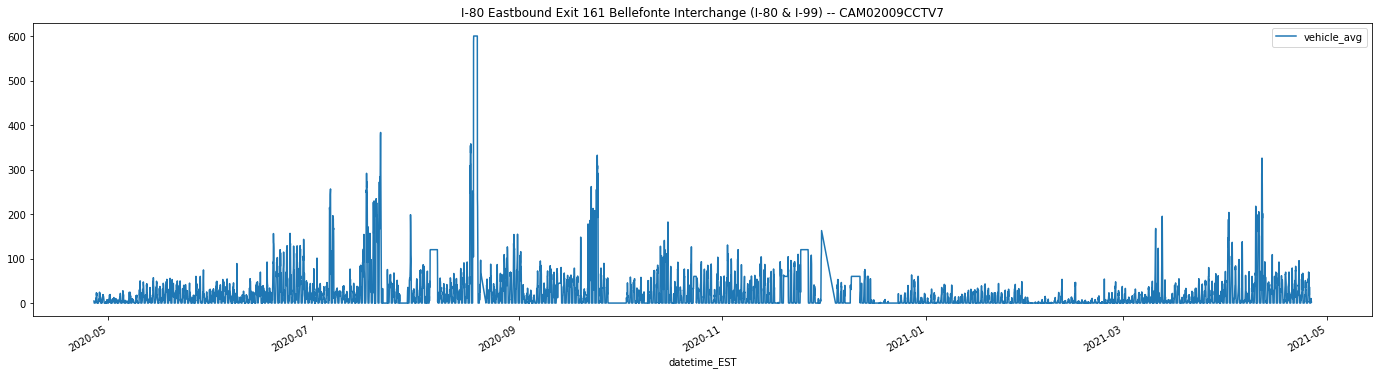

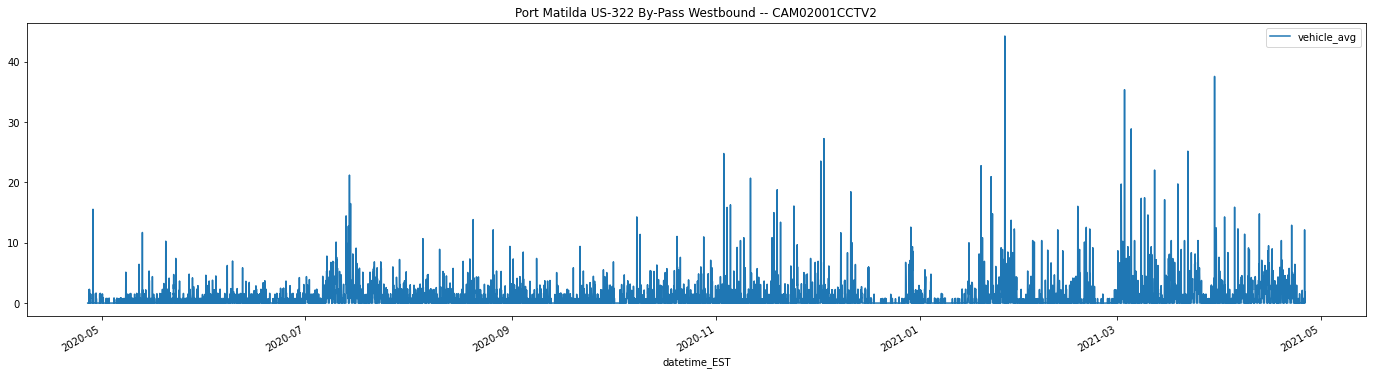

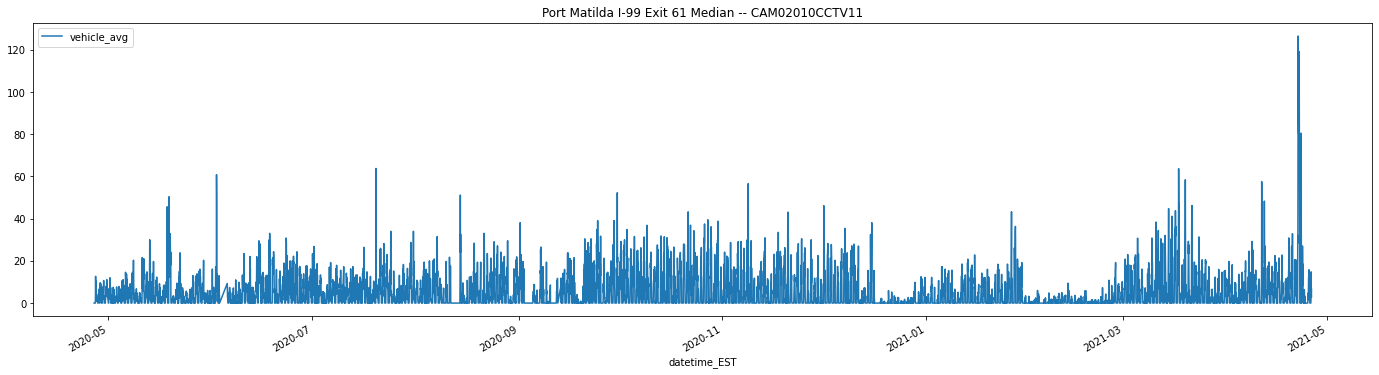

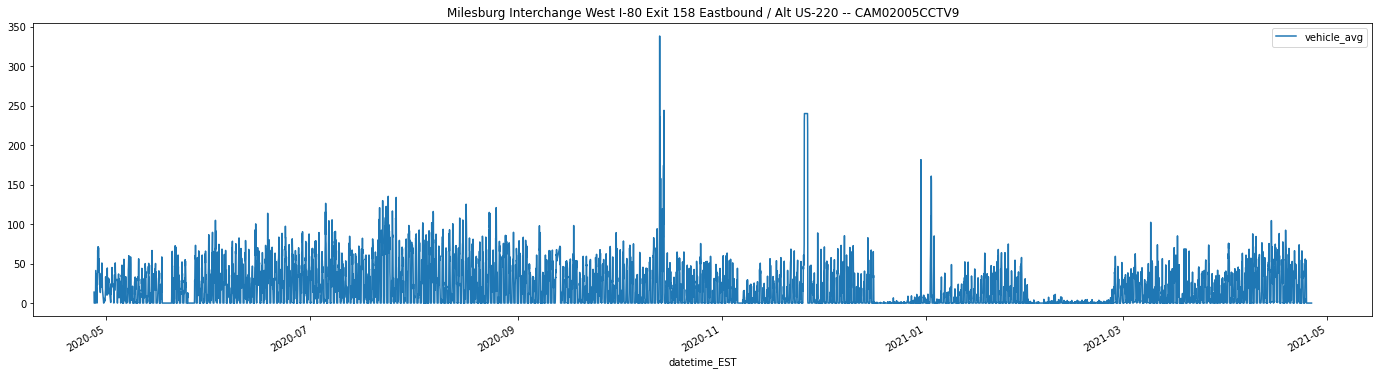

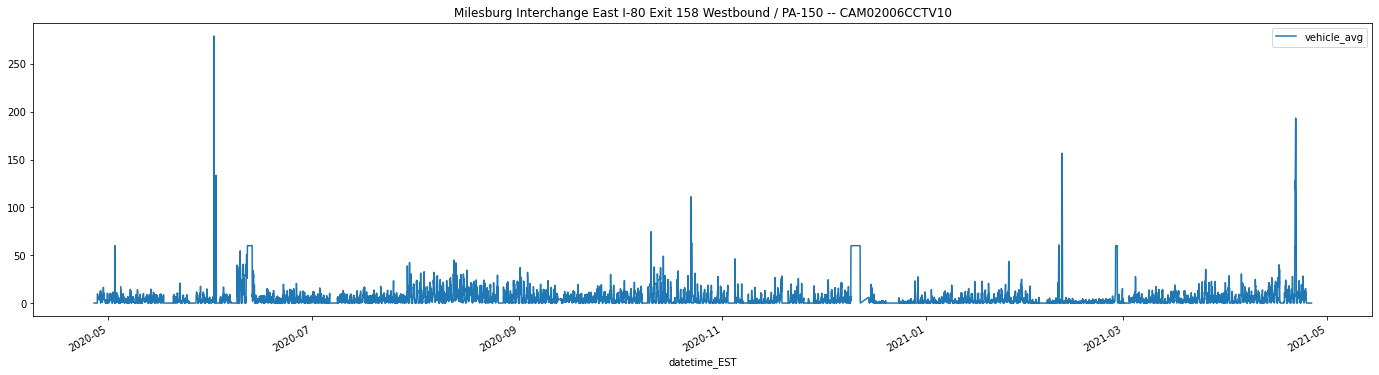

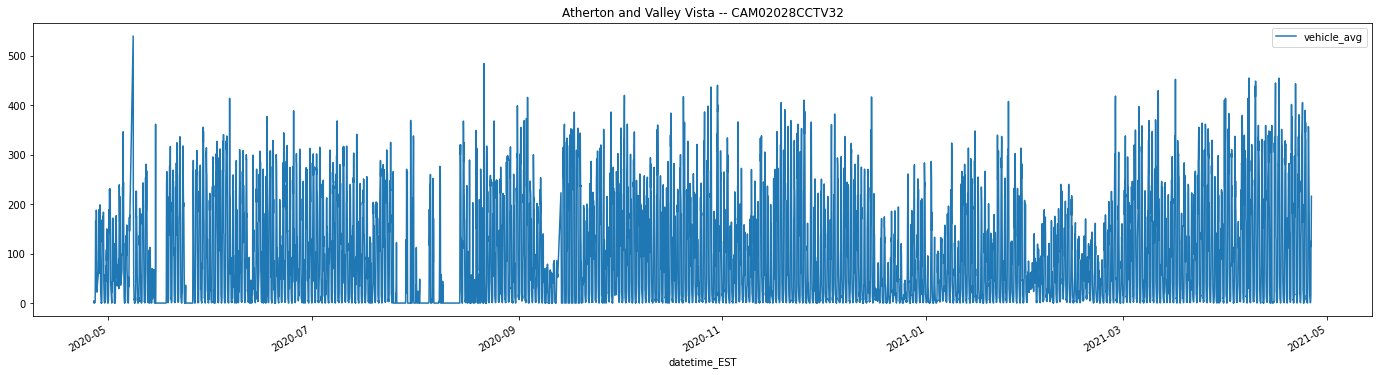

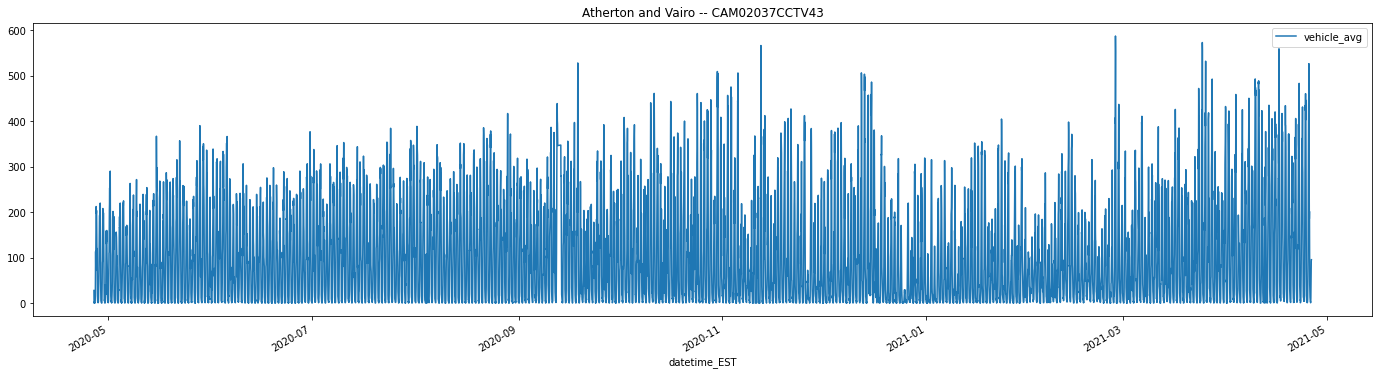

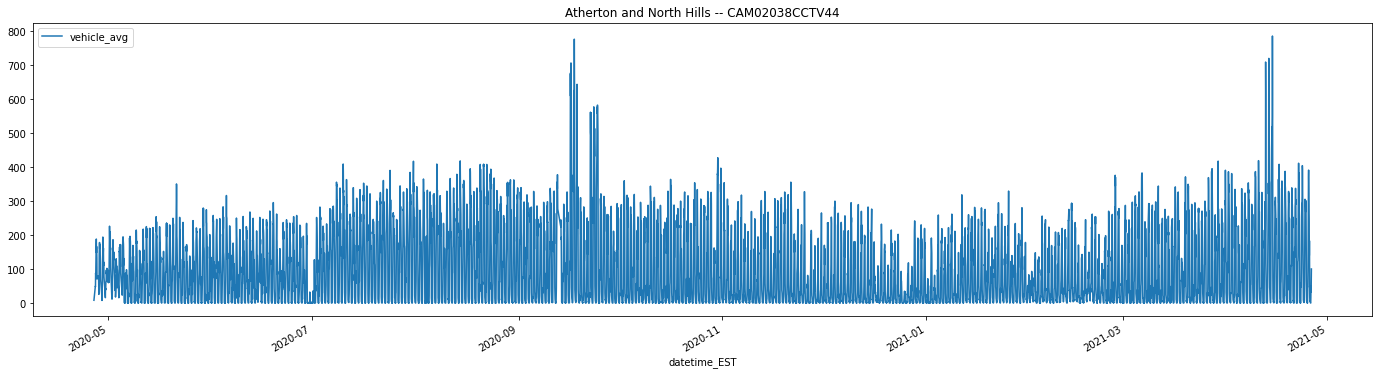

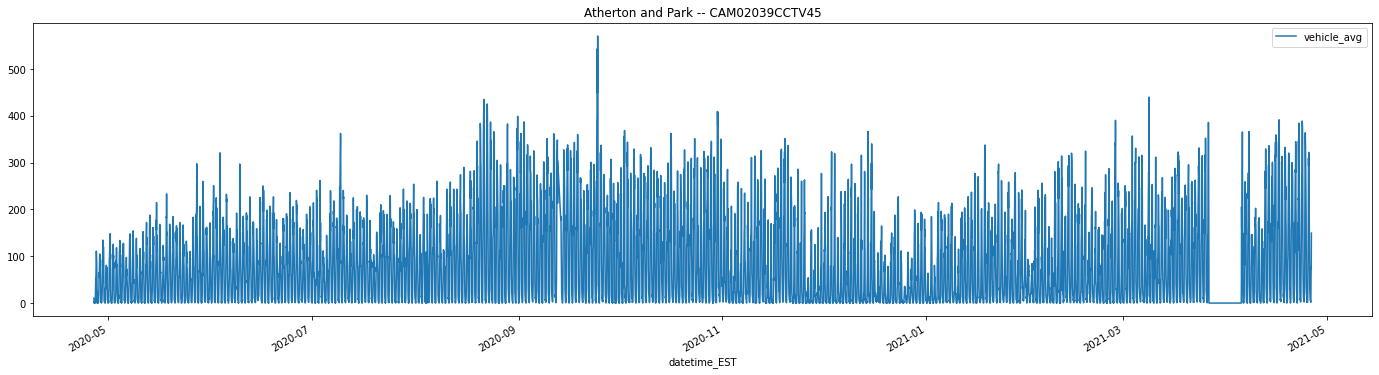

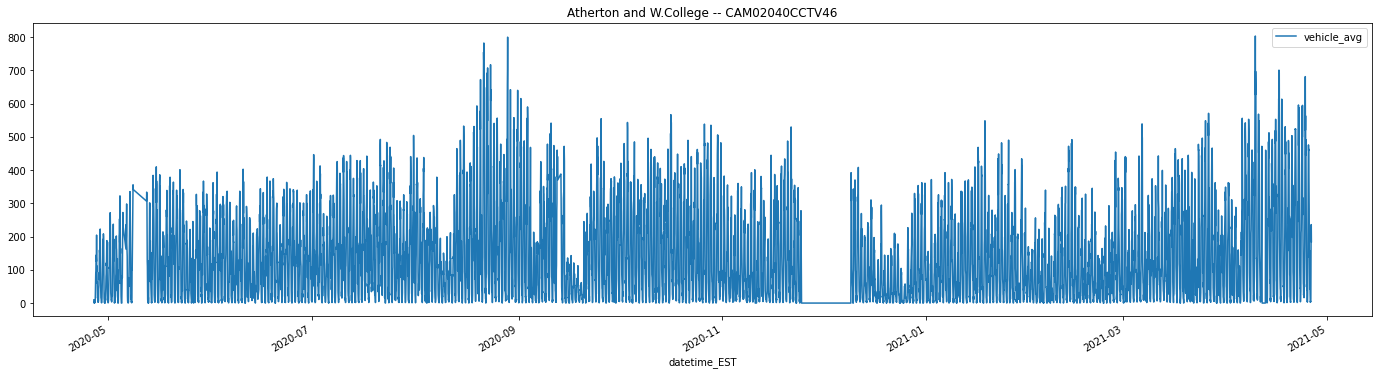

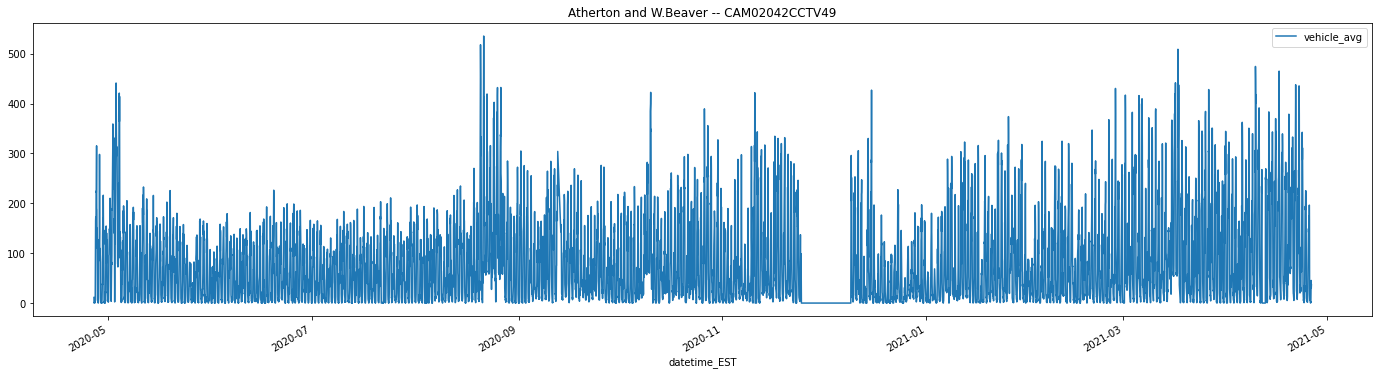

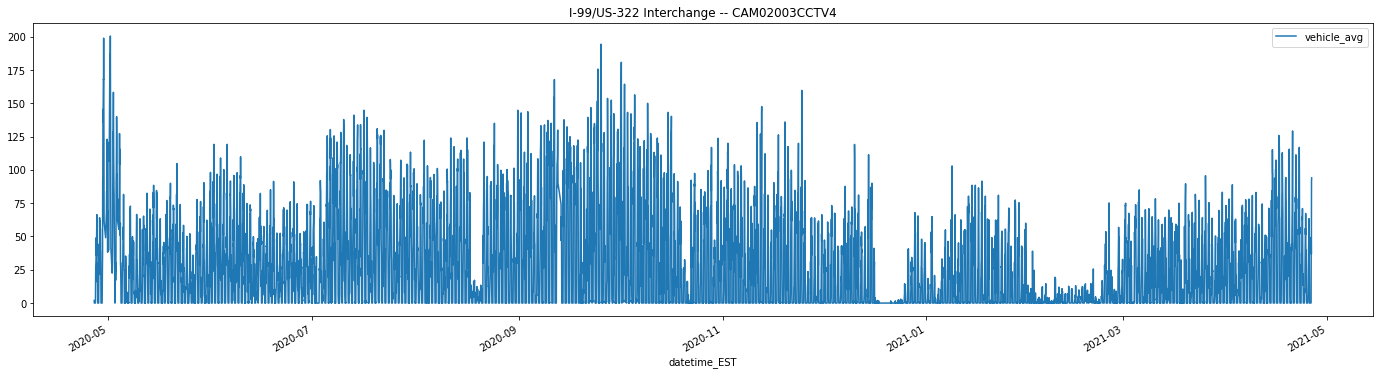

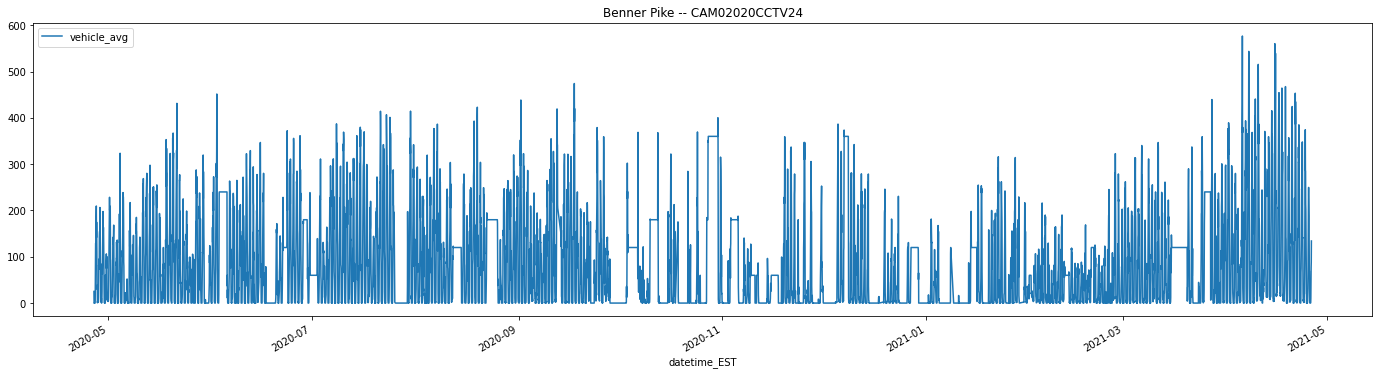

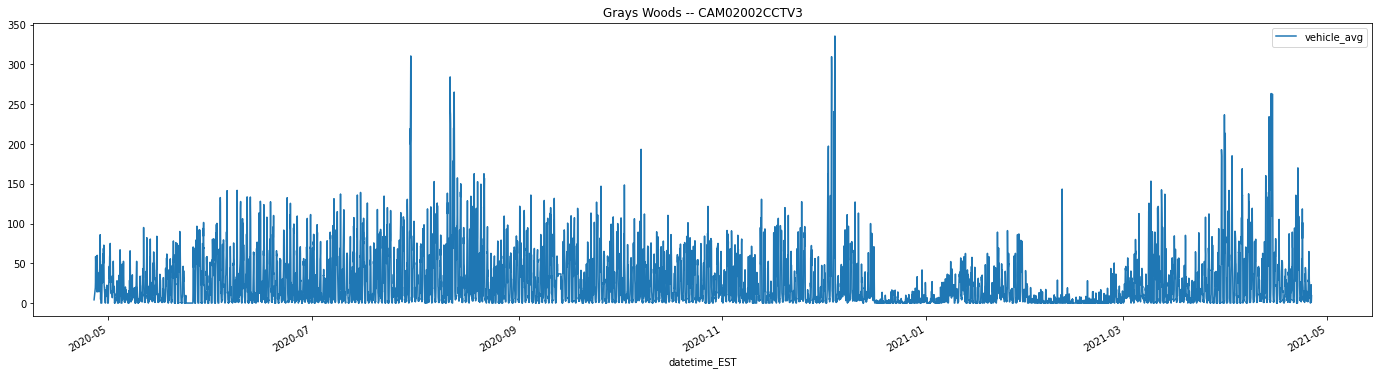

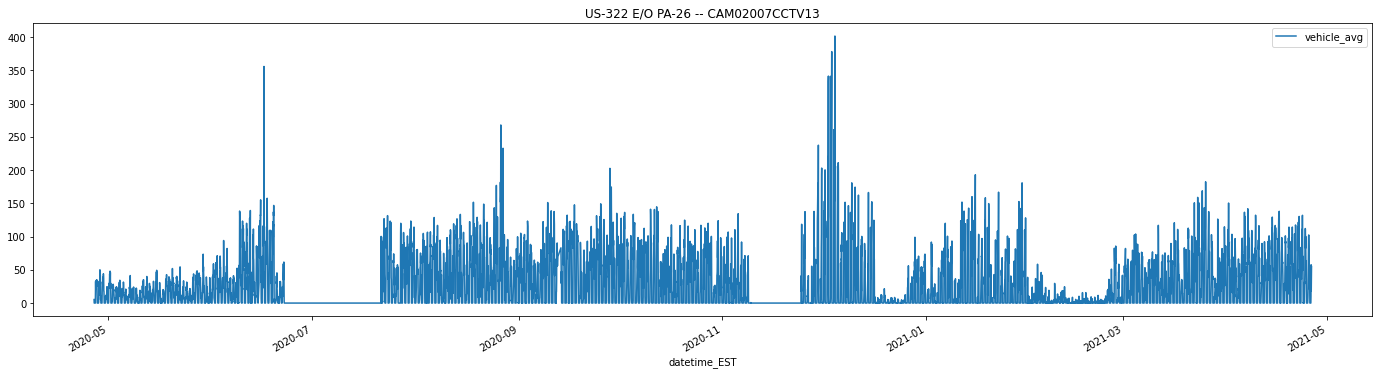

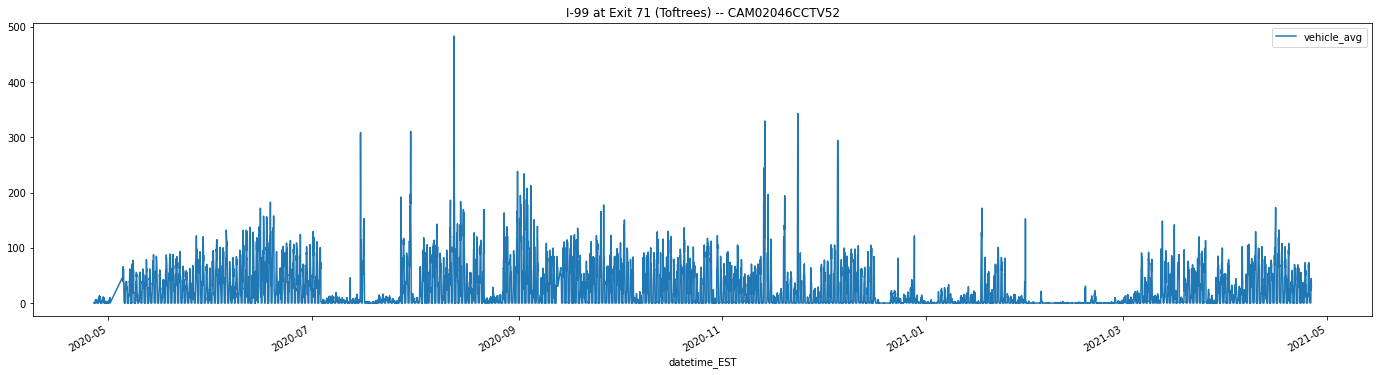

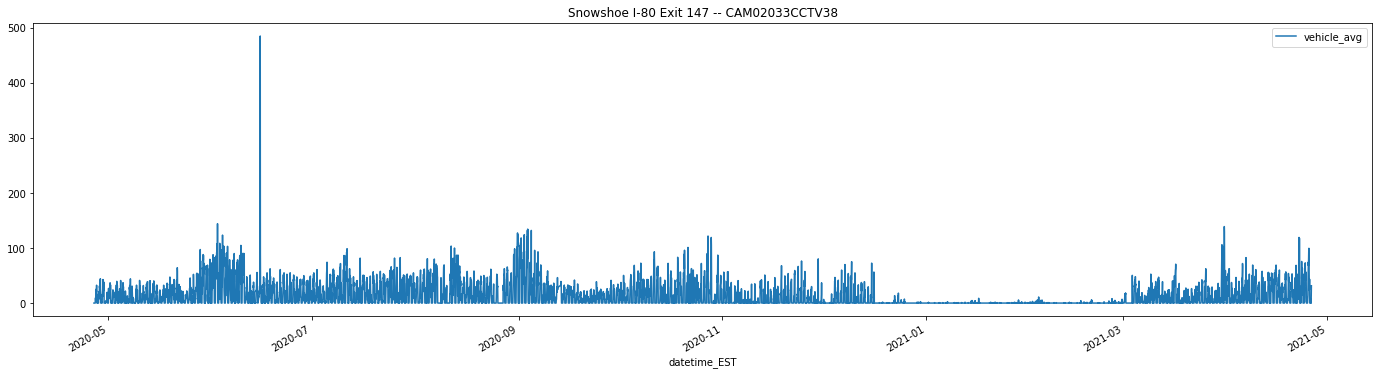

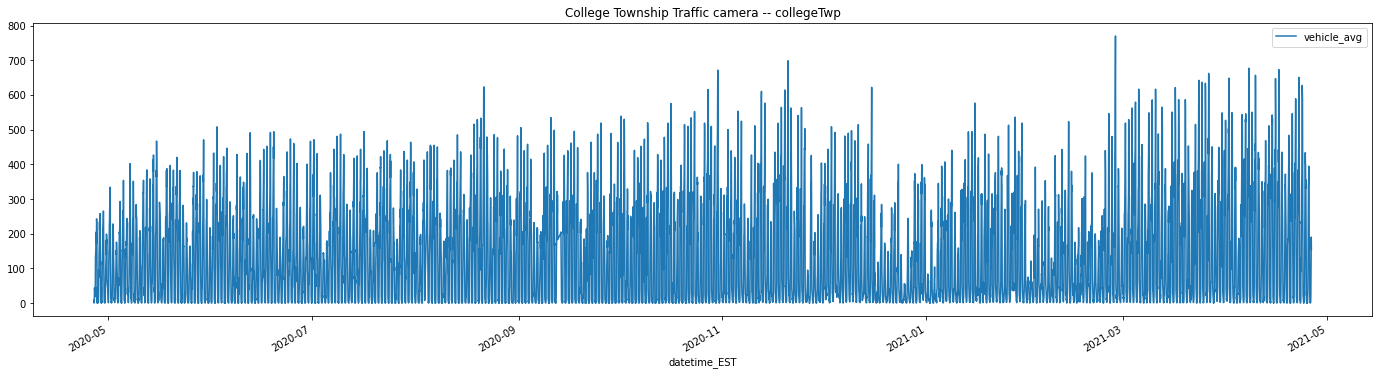

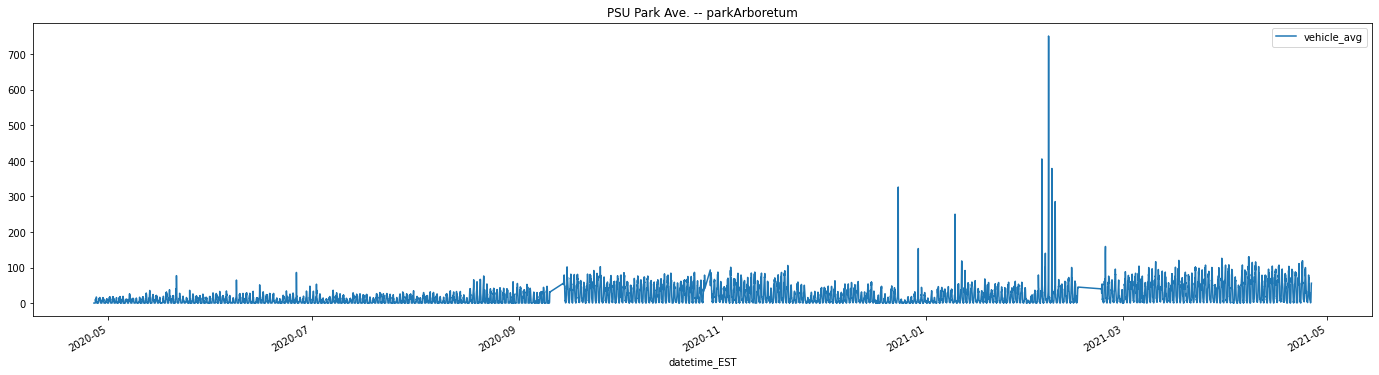

In [8]:

for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

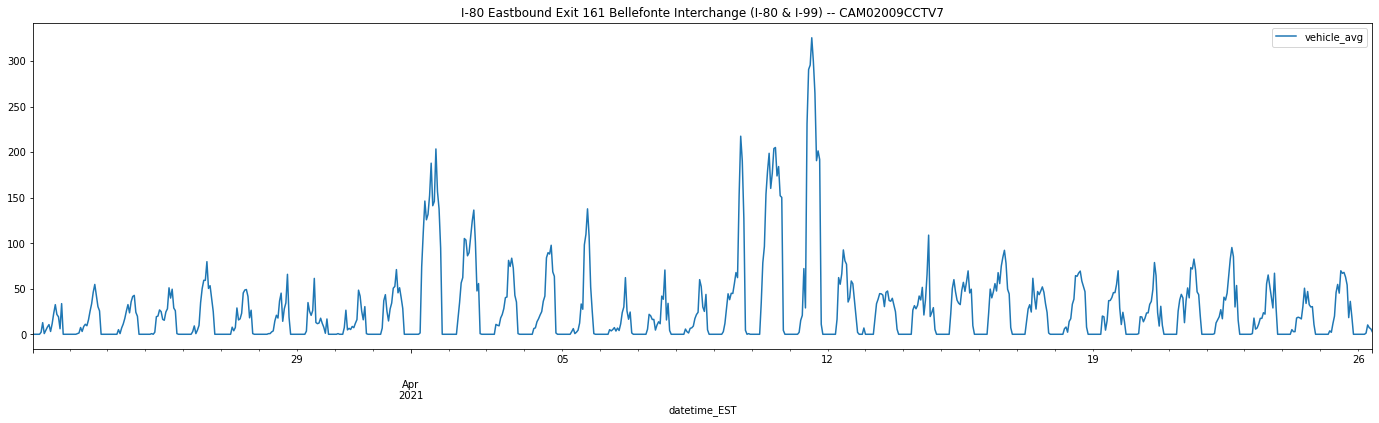

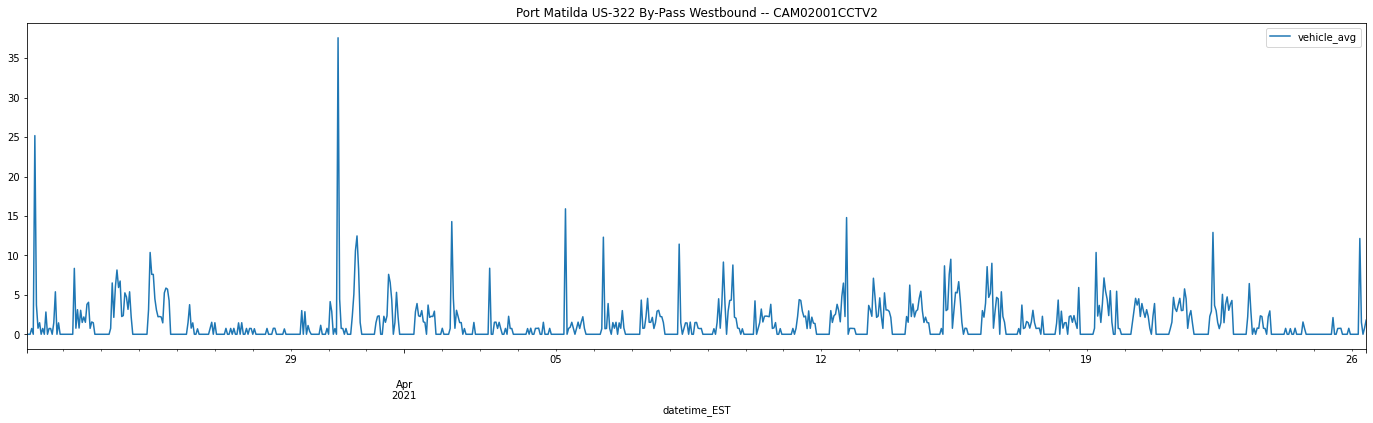

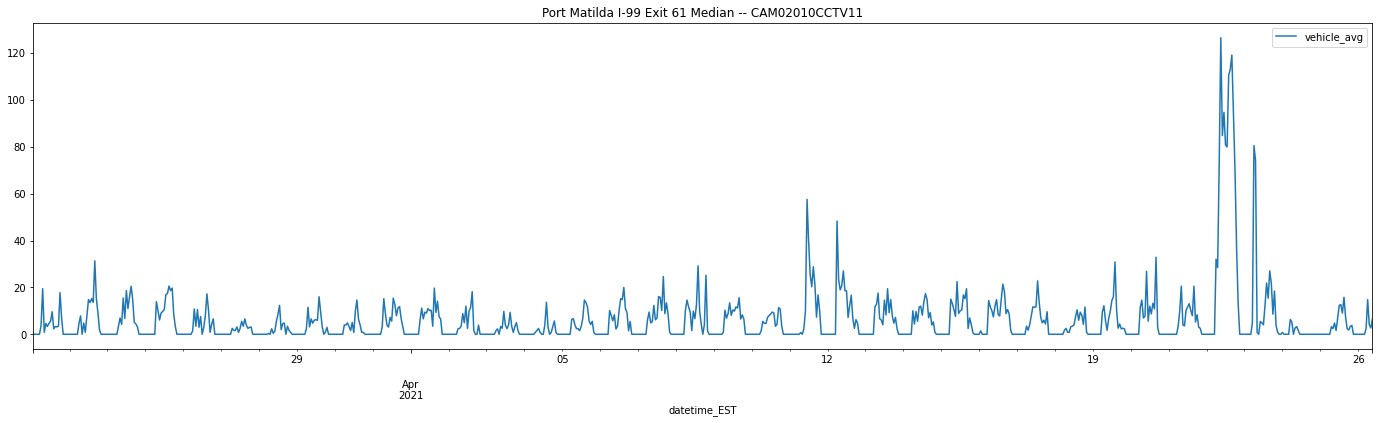

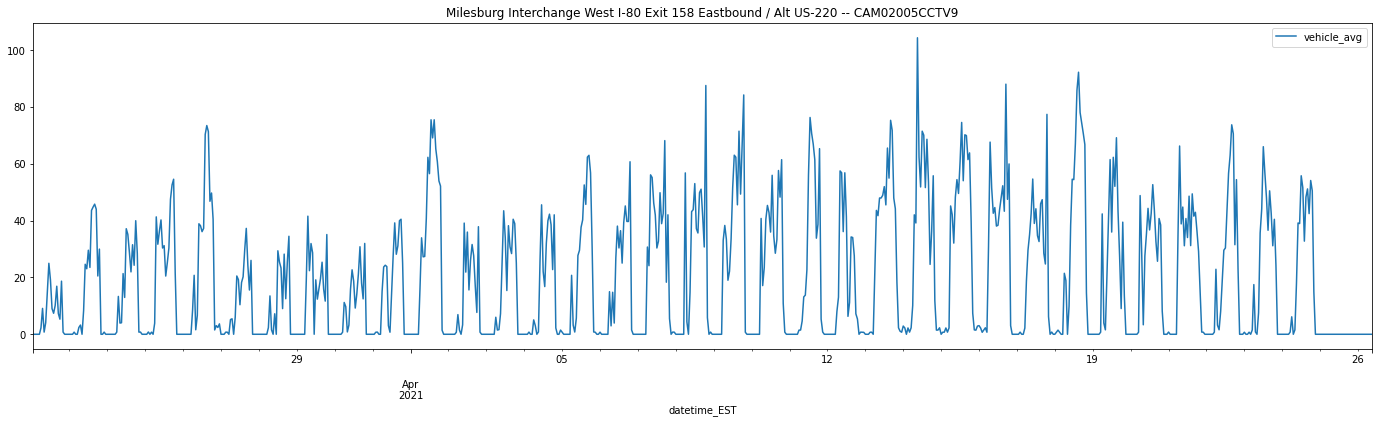

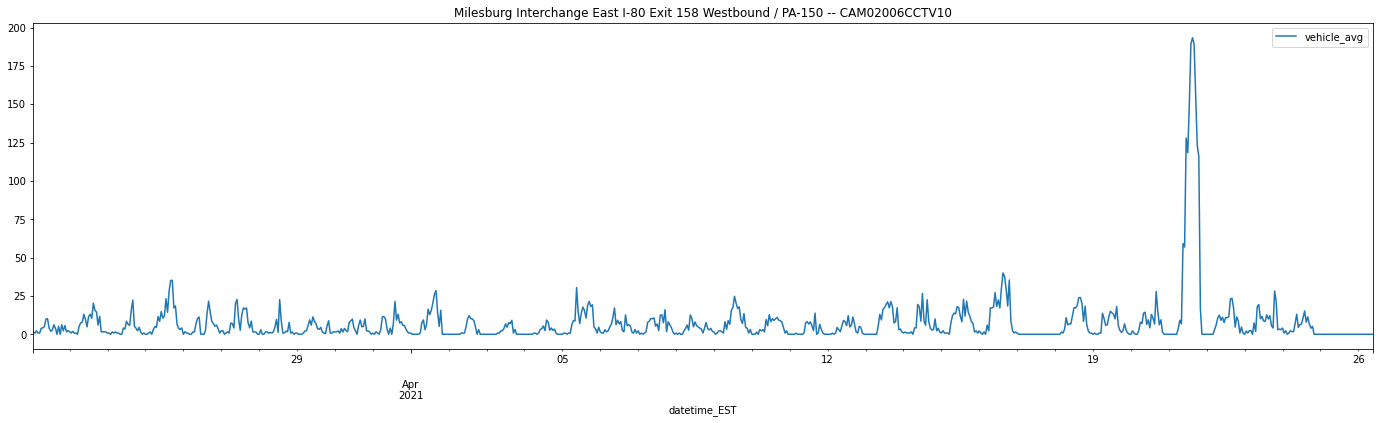

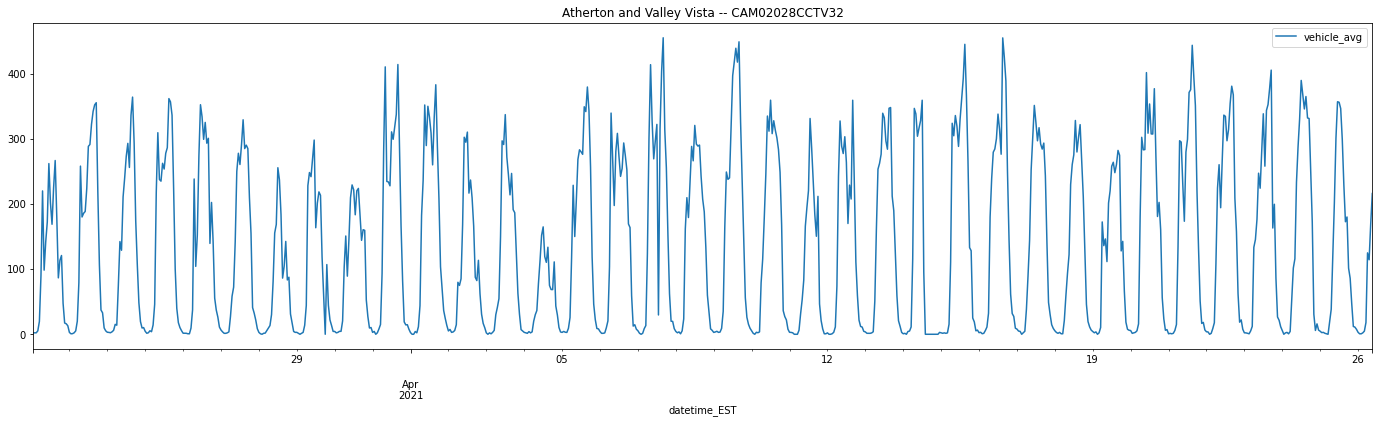

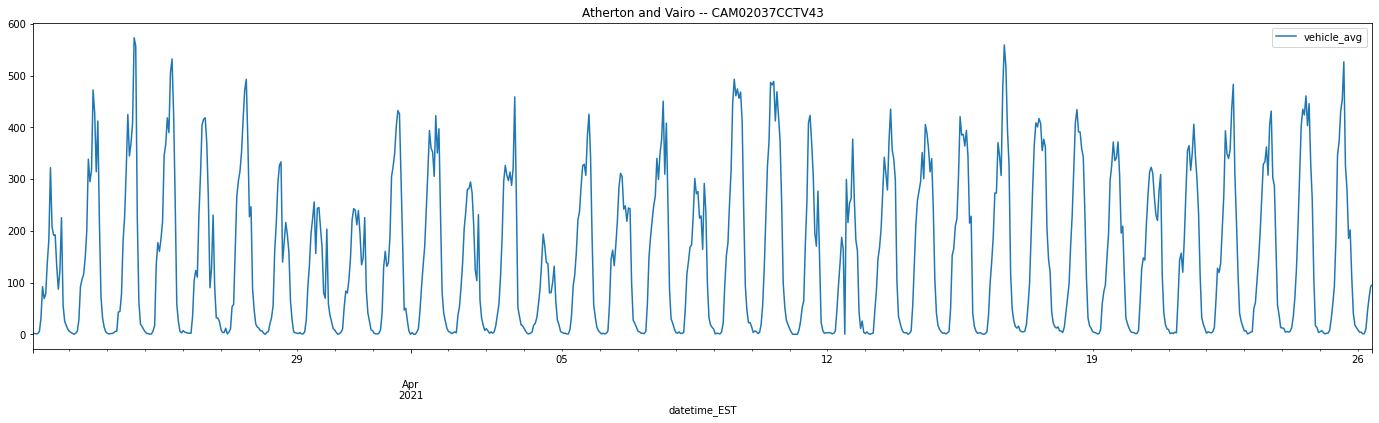

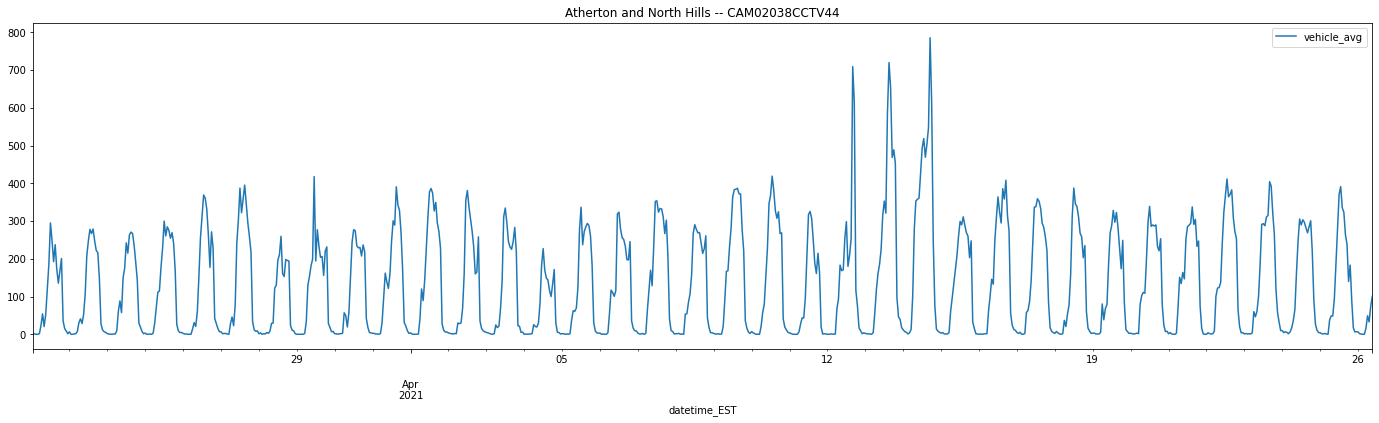

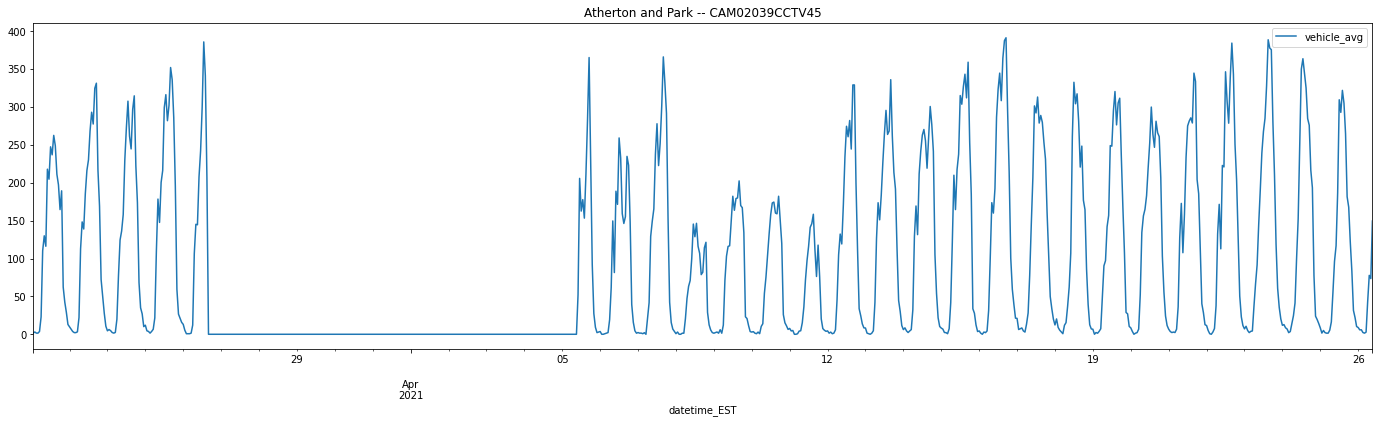

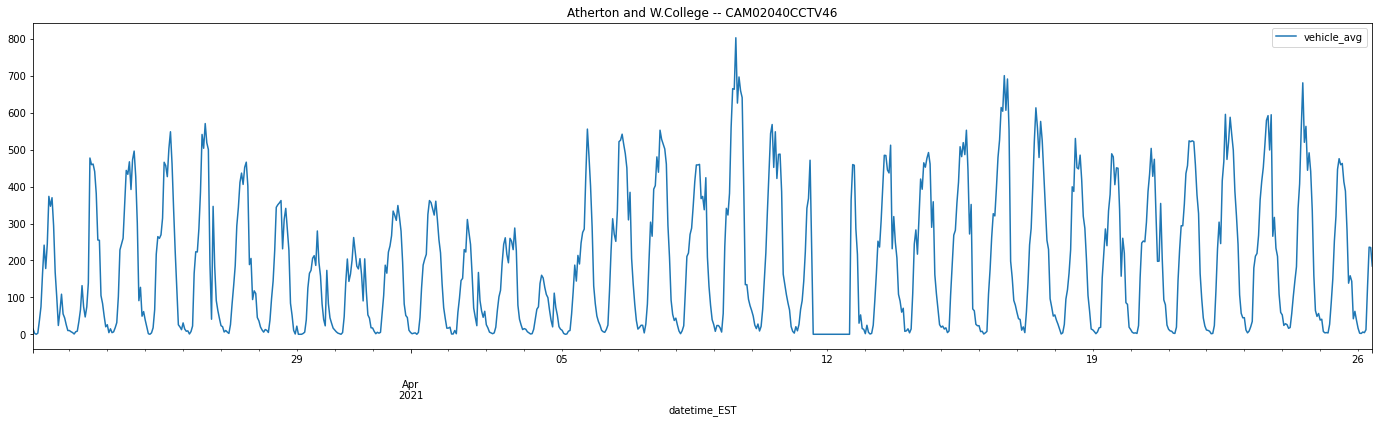

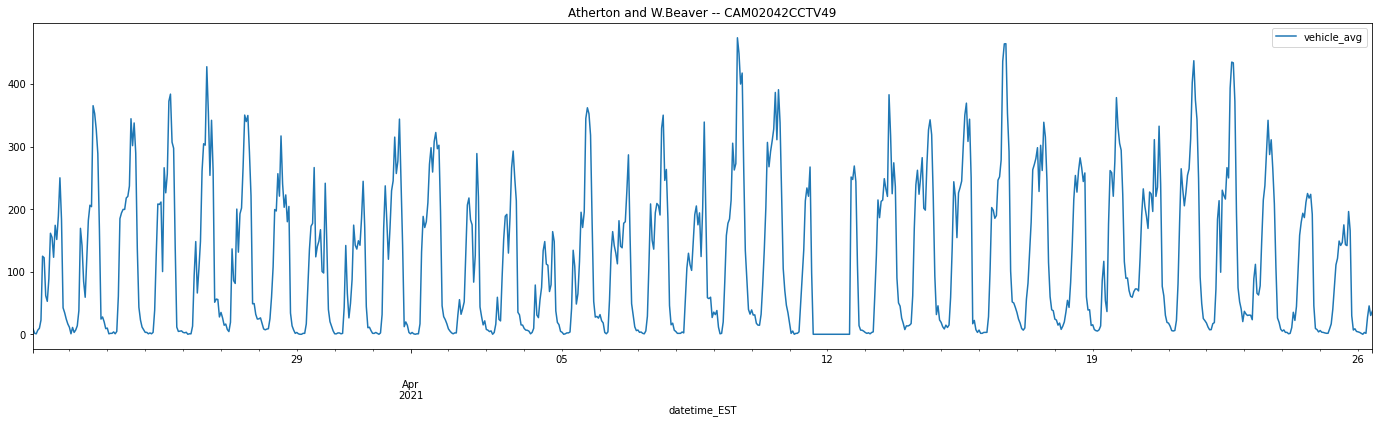

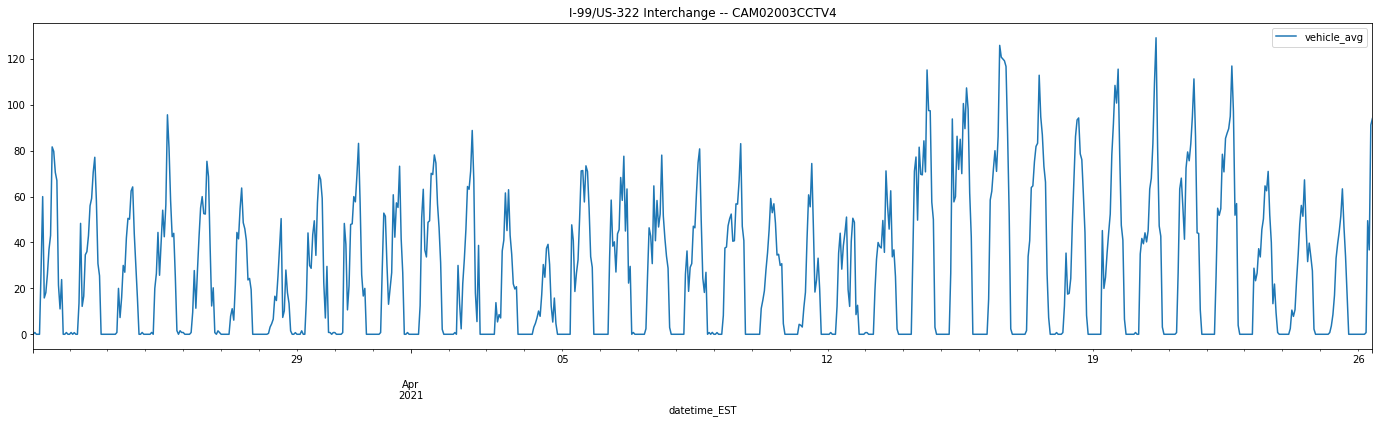

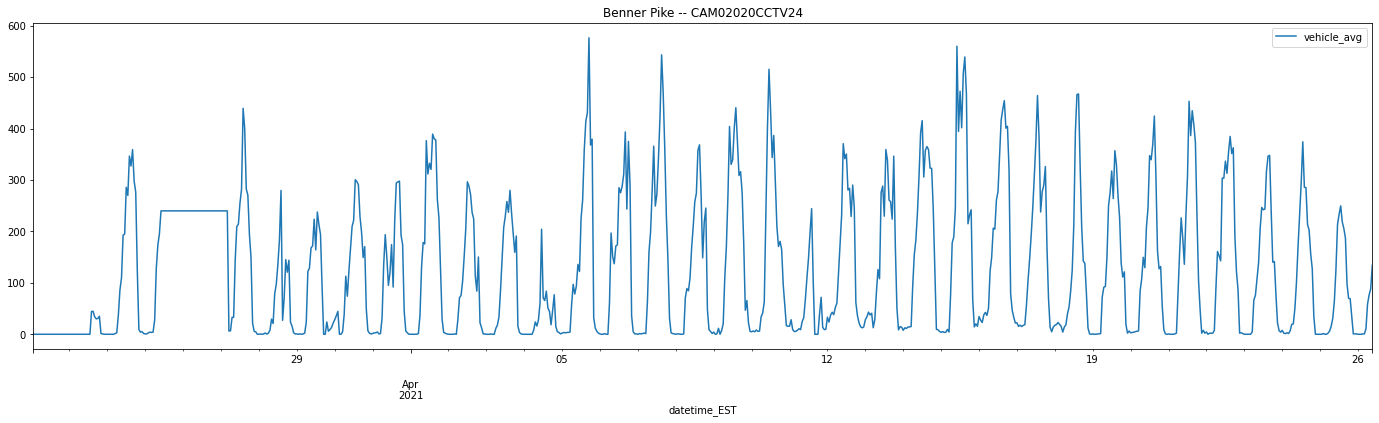

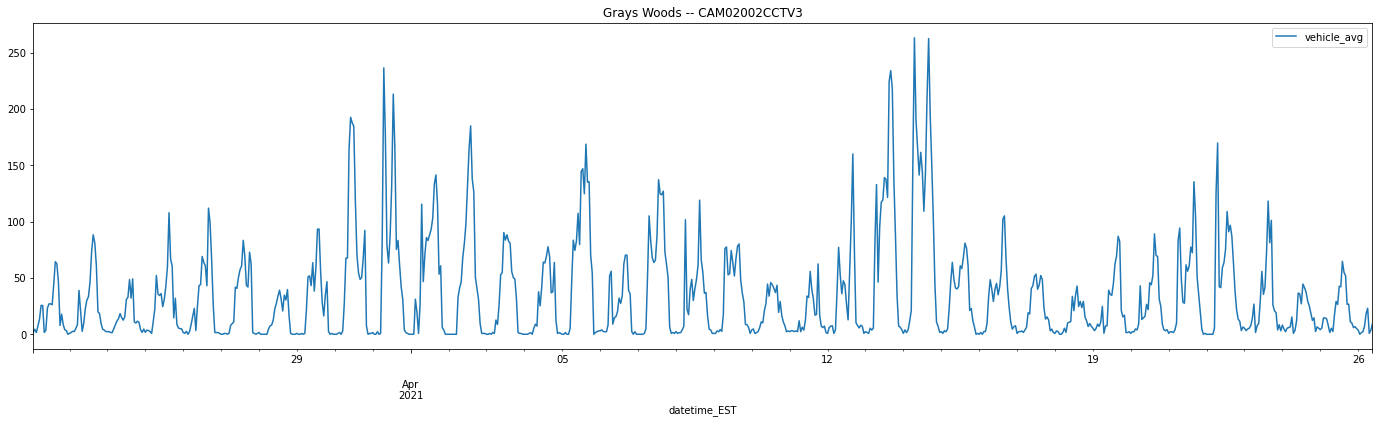

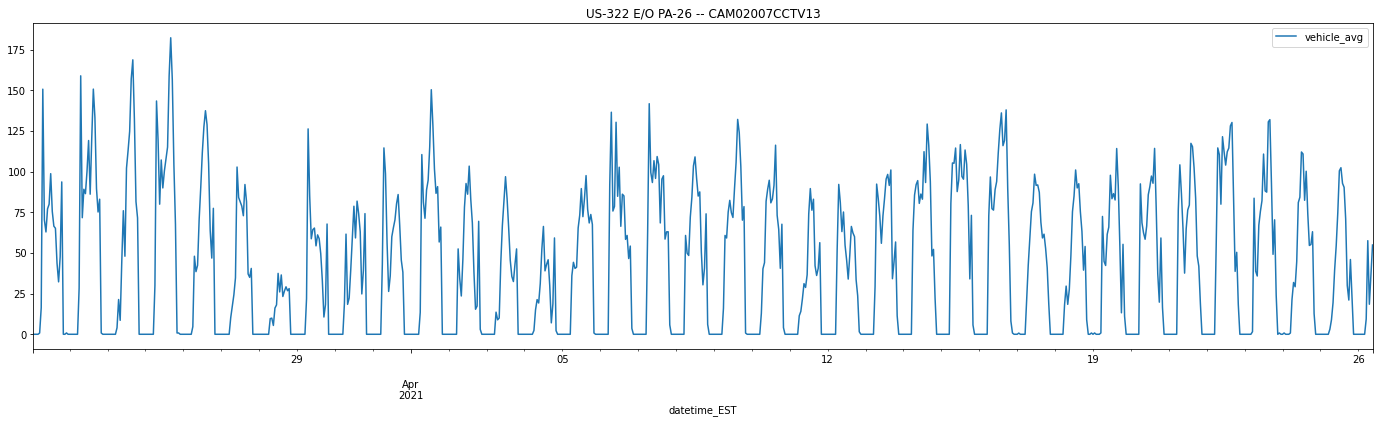

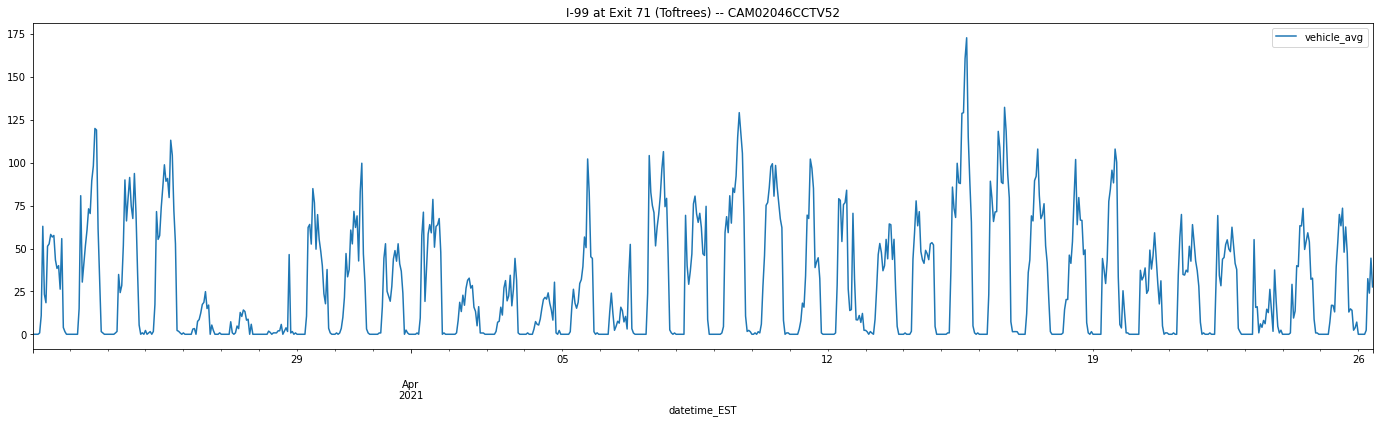

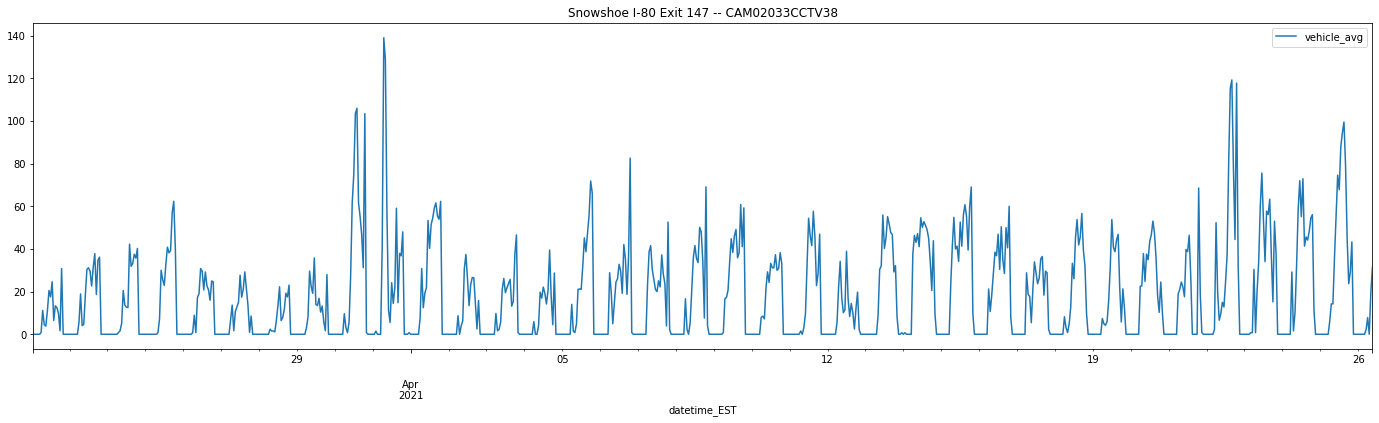

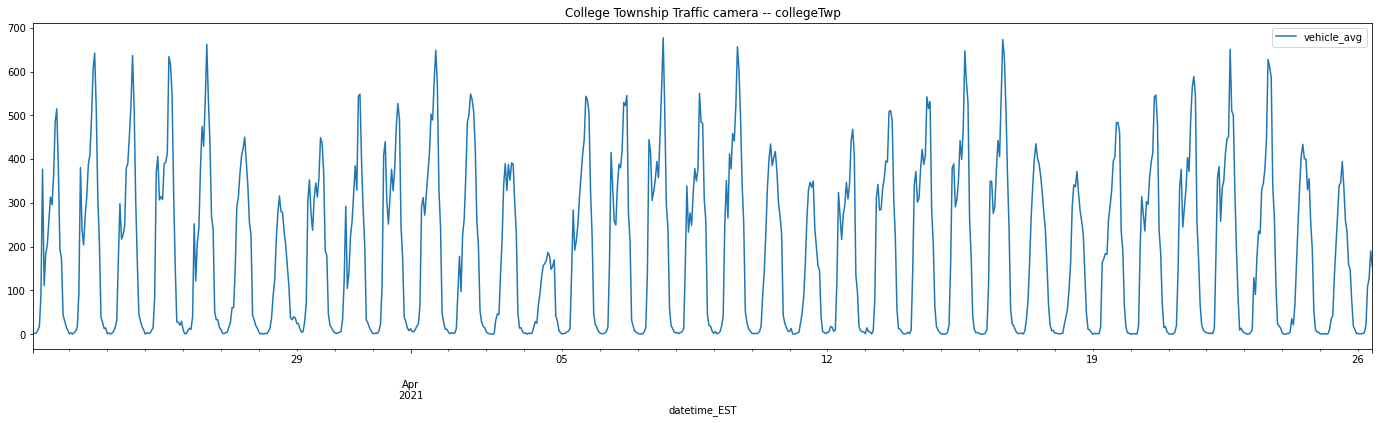

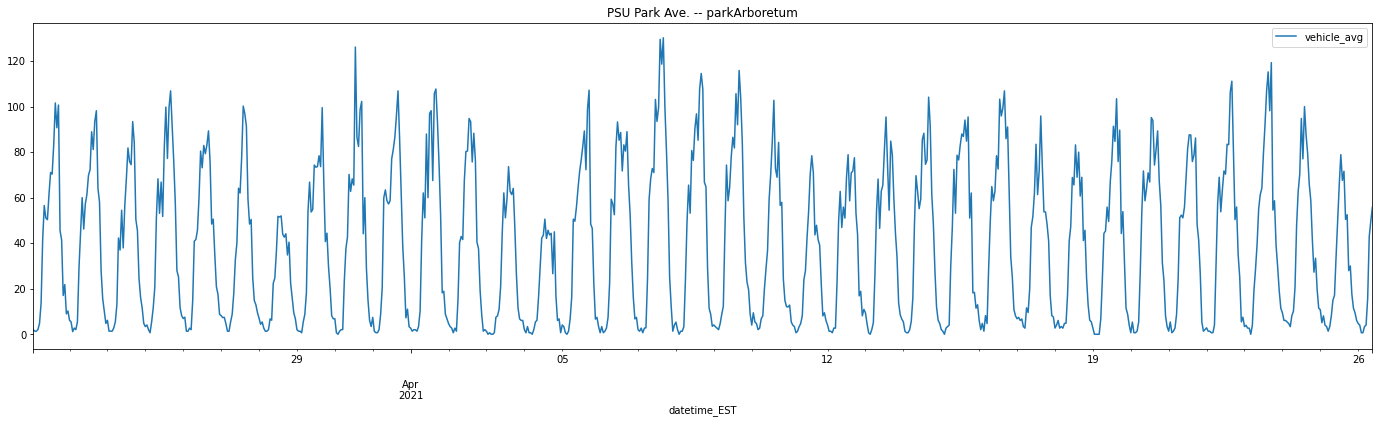

In [9]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    sds = fdf_twp[(fdf_twp['datetime_EST'] > '2021-03-22 00:00:00')]
    ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [10]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn2.drop(xdfn2[(xdfn2["camera_name"] == "CAM02009CCTV7") & (xdfn2['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn2['datetime_EST'] < '2020-8-19 16:03:00') ].index)

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)


xdfn6 = xdfn5.drop(xdfn5[(xdfn5["camera_name"] == "CAM02005CCTV9") & (xdfn5['datetime_EST'] > '2020-11-25 15:00:00') & (xdfn5['datetime_EST'] < '2020-11-27 00:00:00')].index)

xdfn7 = xdfn6.drop(xdfn6[(xdfn6["camera_name"] == "CAM02020CCTV24") & (xdfn6['datetime_EST'] > '2020-12-07 11:00:00') &  (xdfn6['datetime_EST'] > '2020-12-08 17:00:00')].index)

xdfn7b = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02006CCTV10") & (xdfn7['datetime_EST'] > '2021-02-26 16:00:00') &  (xdfn7['datetime_EST'] > '2021-02-27 07:00:00')].index)
xdfn7c = xdfn7b.drop(xdfn7b[(xdfn7b["camera_name"] == "CAM02020CCTV24") & (xdfn7b['datetime_EST'] > '2021-03-25 09:00:00') &  (xdfn7b['datetime_EST'] > '2021-03-27 06:00:00')].index)

In [40]:
print(len(xdfn7))
print(len(xdf8))

10529045
2273014


In [ ]:
#xdfn8 = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02020CCTV24")

In [9]:
ccs =  ["CAM02039CCTV45","CAM02040CCTV46","CAM02042CCTV49","parkArboretum"]
xdf8 = xdfn7c[xdfn7c['camera_name'].isin(ccs)].copy()

In [11]:
icdf = xdfn7c.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7c.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn7c.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7c.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [10]:
# USING ONLY CAMPUS CAMERAS
icdf = xdf8.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf8.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf8.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf8.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdf8.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdf8.set_index('datetime_EST').resample('H').sum().reset_index()

In [12]:
icdf

datetime_EST     camera_name  image_count
0      2020-04-26 20:00:00   CAM02001CCTV2           13
1      2020-04-26 20:00:00   CAM02002CCTV3           44
2      2020-04-26 20:00:00   CAM02003CCTV4           31
3      2020-04-26 20:00:00  CAM02006CCTV10           19
4      2020-04-26 20:00:00  CAM02007CCTV13           34
...                    ...             ...          ...
158133 2021-04-26 09:00:00  CAM02040CCTV46           62
158134 2021-04-26 09:00:00  CAM02042CCTV49           57
158135 2021-04-26 09:00:00  CAM02046CCTV52           63
158136 2021-04-26 09:00:00      collegeTwp           73
158137 2021-04-26 09:00:00   parkArboretum          146

[158138 rows x 3 columns]

In [13]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn7c.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn7c.set_index('datetime_EST').resample('H').sum().reset_index()

In [14]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [15]:
df_sampledh = merged

In [16]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(19.0 * 60.0)))
    return rv   



In [13]:
def get_vc_avg_up(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(4.0 * 60.0)))
    return rv   

In [17]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [14]:
# USING ONLY CAMPUS CAMERAS
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg_up, axis=1)

In [18]:
df_sampledh.to_csv("vehicle_avg_per_hour_all_cameras_427-042621.csv",index=False)

In [22]:
df_sampledh.to_csv("vehicle_avg_per_hour_up_cameras_427-032221.csv",index=False)

In [16]:
#df_sampledh = pd.read_csv("vehicle_avg_per_hour_all_cameras_427-1110.csv")

In [19]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [20]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [21]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0    2020-04-26 20:00:00            144        960   171.000000  20   6
1    2020-04-26 21:00:00              0         68     0.000000  21   6
2    2020-04-26 22:00:00             11        516    24.302326  22   6
3    2020-04-26 23:00:00             38        794    54.559194  23   6
4    2020-04-27 00:00:00             77        796   110.276382   0   0
...                  ...            ...        ...          ...  ..  ..
8724 2021-04-26 05:00:00            192       1491   146.800805   5   0
8725 2021-04-26 06:00:00           1035       1512   780.357143   6   0
8726 2021-04-26 07:00:00           1234       1509   932.246521   7   0
8727 2021-04-26 08:00:00           1499       1384  1234.725434   8   0
8728 2021-04-26 09:00:00           1378       1167  1346.118252   9   0

[8729 rows x 6 columns]

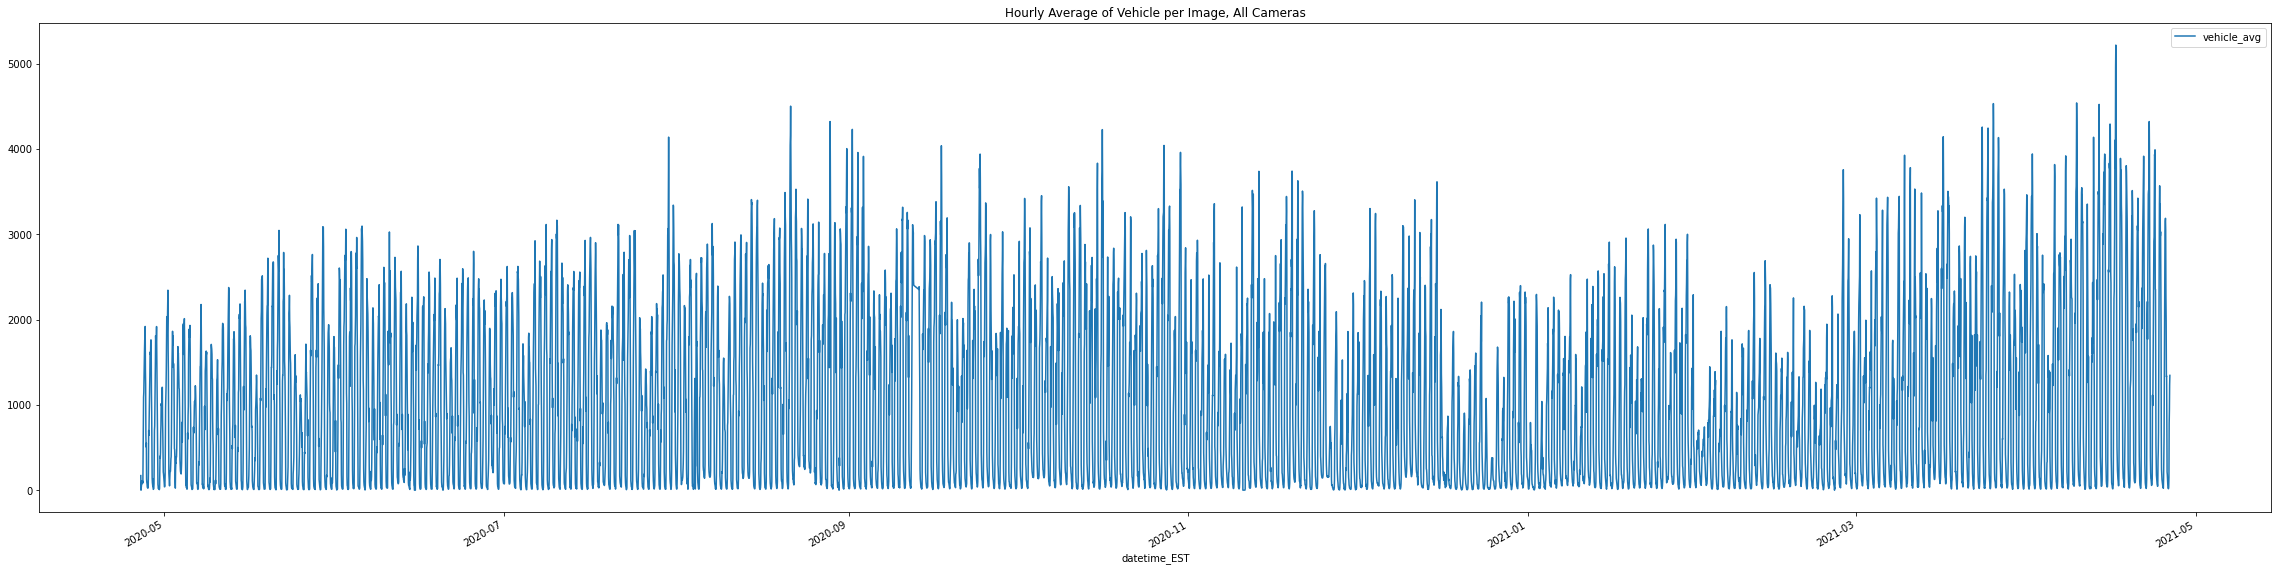

In [22]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicle per Image, All Cameras")

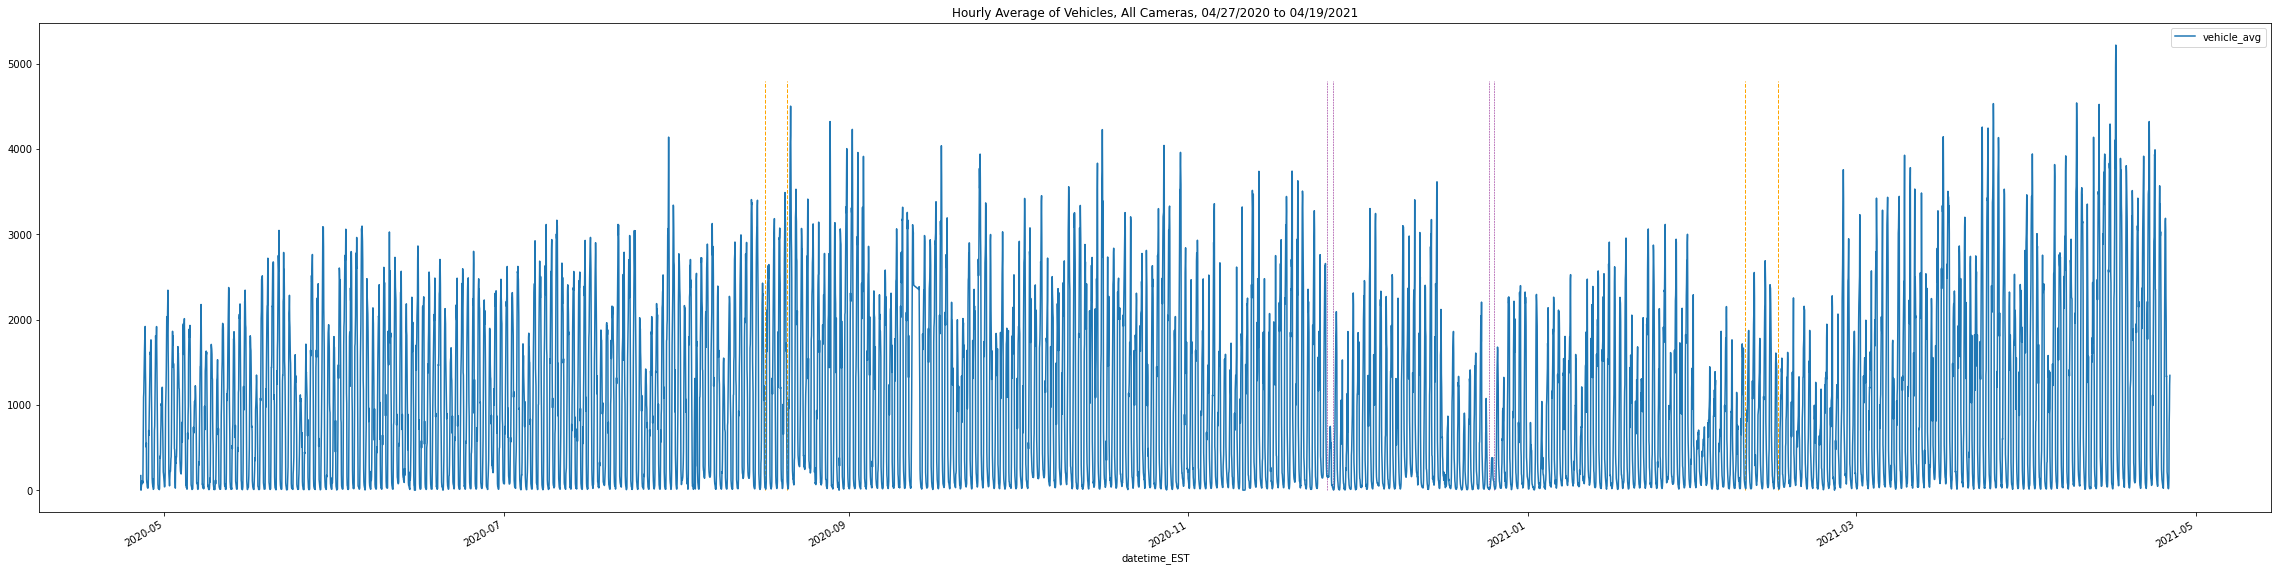

In [23]:
ax = df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras, 04/27/2020 to 04/19/2021")
y_min = 0
y_max = 4800#df_sampledh.vehicle_count.max()

plt.vlines(x=['2020-11-26 00:00:00','2020-11-27 00:00:00','2020-12-25 00:00:00','2020-12-26 00:00:00'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-08-17 00:00:00','2020-08-21 00:00:00','2021-02-09 00:00:00','2021-02-15 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

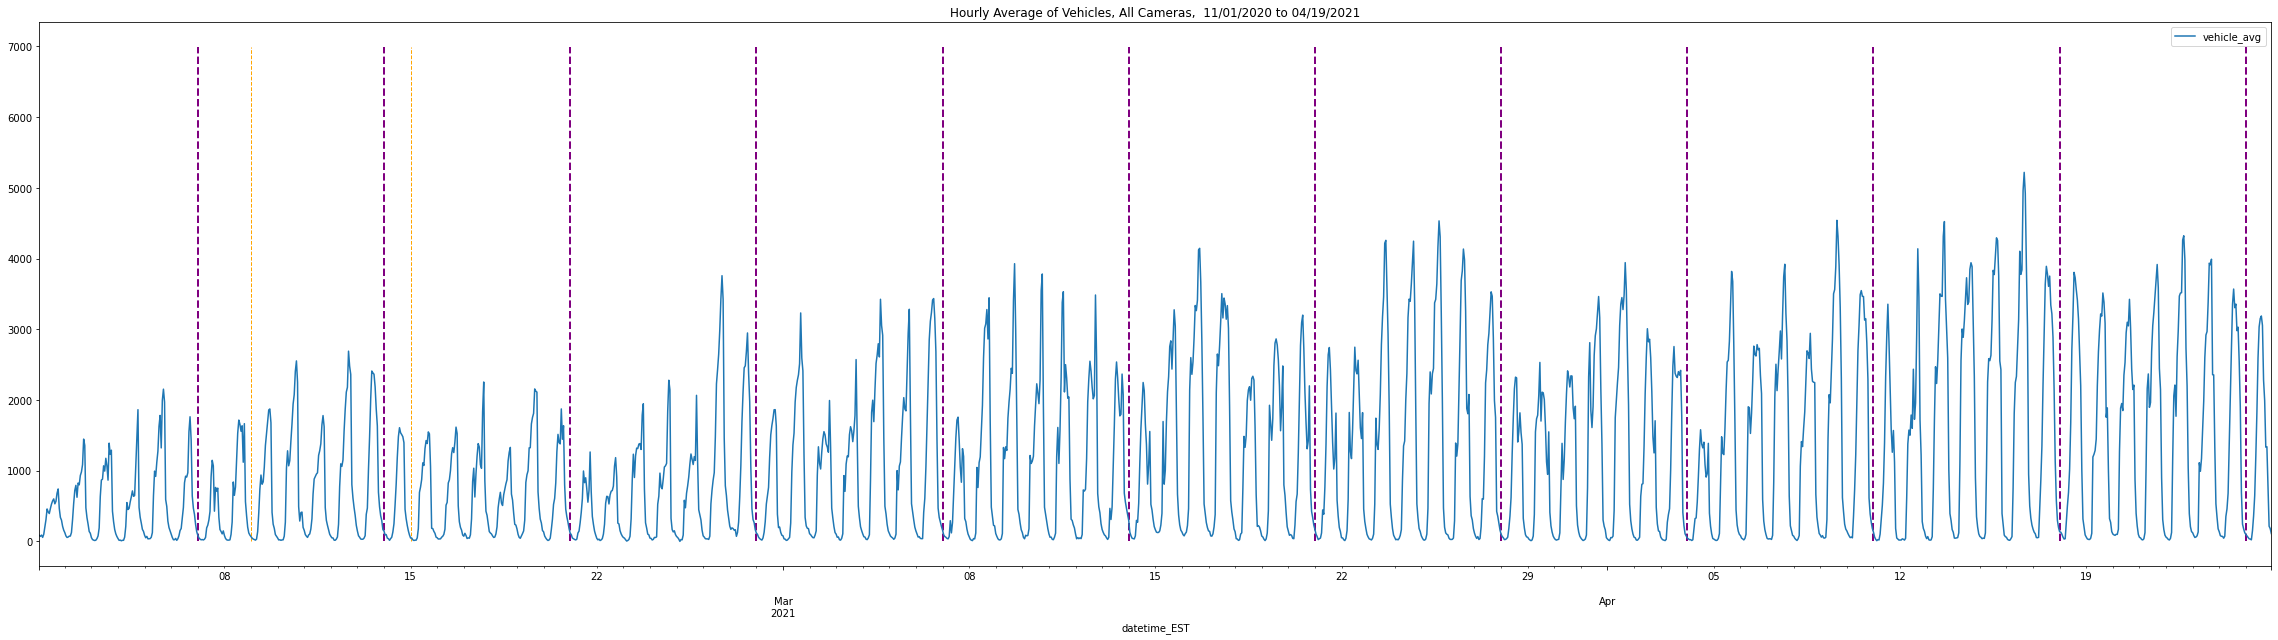

In [24]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2021-02-01 00:00:00') & (df_sampledh['datetime_EST'] < '2021-04-26 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  11/01/2020 to 04/19/2021")
y_min = sds.vehicle_count.min()
y_max = sds.vehicle_count.max()

plt.vlines(x=['2021-02-07','2021-02-14','2021-02-21','2021-02-28','2021-03-07','2021-03-14','2021-03-21','2021-03-28','2021-04-04','2021-04-11','2021-04-18','2021-04-25'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')
plt.vlines(x=['2021-02-09 00:00:00','2021-02-15 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1.0, label='vline_multiple')

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))